<a href="https://colab.research.google.com/github/1218muskan/DL-CV_IGDTUW/blob/main/TensorflowANN_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# keras : public API

## Loading the data

In [19]:
# minst : dataset of images of handwritten digits
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
import matplotlib.pyplot as plt

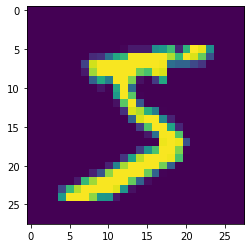

In [22]:
plt.imshow(x_train[0])

In [23]:
x_train.shape
# 60,000 images for training

(60000, 28, 28)

In [44]:
x_train[0].shape
# 28/28 is the dimension of image, i.e. each image has 28pixels x 28pixels

(28, 28)

Therefore, a single image is of 28x28 dimension, i.e. it will be having 784 (28*28) features.

And, Hence our input layer will be having 784 neurons.

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

There are 10 unique value of output ( digits 0-9). Hence, we will be having 10 neurons in our Output layer.

## Build the Model

In [27]:
# Normalizing the data
x_train, x_test = x_train / 255.0 , x_test / 255.0

# divided by 255 -> the data will be sqezed btw 0 and 1, 
# as divided the pixels with maximum value of RGB code (255)

In [32]:
model = Sequential([
                    # put layers one-by-one
                    Flatten(input_shape=(28,28)),      # Input Layer
                    Dense(256, activation='sigmoid'),  # Hidden layer
                    Dense(10, activation='softmax')    # Output Layer
])

# Flatten is used to convert a matrix in 1D array 
# (So, whenever we will be having image dataset, our 1st layer will always be flatten)

In [33]:
model

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Parameters: weights and bias it will train

In [36]:
model.compile(optimizer='sgd', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 7s 4ms/step - loss: 1.3621 - accuracy: 0.7147 - val_loss: 0.7926 - val_accuracy: 0.8396
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6513 - accuracy: 0.8534 - val_loss: 0.5272 - val_accuracy: 0.8732
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4964 - accuracy: 0.8755 - val_loss: 0.4379 - val_accuracy: 0.8885
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4318 - accuracy: 0.8866 - val_loss: 0.3920 - val_accuracy: 0.8960
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3959 - accuracy: 0.8921 - val_loss: 0.3648 - val_accuracy: 0.9005


1875 - no. of batches our model created out of 60,000 records

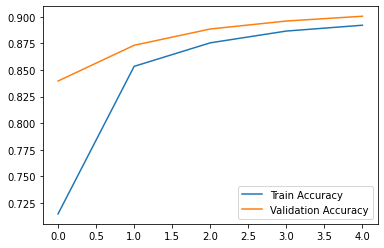

In [39]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

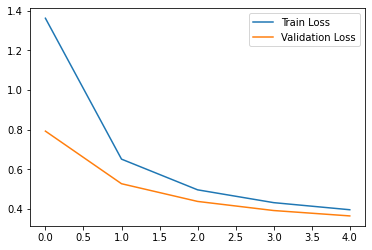

In [40]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## Making predictions

In [63]:
# passing firts 10 images
model.predict(x_test[:10])

array([[2.12393003e-04, 5.80337610e-06, 1.85035286e-04, 1.21743104e-03,
        5.57087187e-05, 1.57287403e-04, 2.28830208e-06, 9.93984282e-01,
        4.31985936e-05, 4.13663732e-03],
       [1.96399968e-02, 9.38319834e-04, 8.07397544e-01, 3.60824428e-02,
        7.08455173e-06, 2.43019536e-02, 1.00765578e-01, 5.25700034e-06,
        1.08495215e-02, 1.23016634e-05],
       [1.04256673e-04, 9.47502375e-01, 1.49816377e-02, 8.15295335e-03,
        1.06355082e-03, 6.60213176e-03, 5.01023233e-03, 8.96132737e-03,
        5.49320178e-03, 2.12841551e-03],
       [9.94615376e-01, 1.76058492e-07, 5.09995560e-04, 1.44826539e-04,
        3.23607651e-06, 2.87105865e-03, 1.20565400e-03, 4.23854683e-04,
        1.42348465e-04, 8.34704988e-05],
       [2.48020841e-03, 1.35730050e-04, 1.56430639e-02, 1.06416072e-03,
        8.35384488e-01, 5.36773866e-03, 9.32458788e-03, 2.84903571e-02,
        6.57598209e-03, 9.55336615e-02],
       [1.82256026e-05, 9.68886971e-01, 5.71495015e-03, 6.82469551e-03,
   

In [64]:
for prediction in model.predict(x_test[:10]):
  print(np.argmax(prediction))

7
2
1
0
4
1
4
9
6
9


In [65]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

## Testing Model on Random Image

In [45]:
# importing openCV
import cv2

In [46]:
test_img = cv2.imread('sample_img.png')

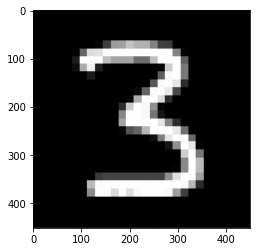

In [47]:
plt.imshow(test_img)

In [48]:
test_img.shape

(452, 451, 3)

If we perform testing on this image, it will show us error as its dimeansion is not matching with dimension of images in our dataset

In [50]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
# to drop that 3 in dimension , converting RGB colored imaged to gray scale image

In [51]:
test_img.shape

(452, 451)

In [52]:
# Resizing the image 
test_img = cv2.resize(test_img, (28,28))

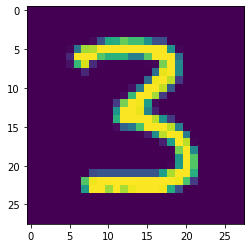

In [53]:
plt.imshow(test_img)

In [54]:
test_img.shape

(28, 28)

Now, the dimensions are same , therefore we can perform our testing on this image

In [55]:
# Flattening the image to get 784 neurons
# test_img = test_img.flatten()

# no need to flatten the image explicitly coz our 1st layer is flatten only which will do this task

In [59]:
test_img = np.reshape(test_img, (1, 28, 28))
prediction = model.predict(test_img)

# training data dimension - (60000, 28, 28) i.e. (no of images , dimension)
# that's why we used reshape 

In [60]:
prediction

array([[5.5063110e-09, 1.6153527e-06, 1.4612790e-05, 9.9996305e-01,
        1.3624780e-10, 1.1323081e-06, 2.4728675e-10, 1.8600831e-09,
        1.9496072e-05, 6.4082228e-10]], dtype=float32)

In [62]:
np.argmax(prediction)
# max probability is on index 3 which represents number 3

3